In [76]:
import matplotlib.pyplot as plt

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, BatchNormalization, Activation, Flatten, Dropout, Lambda, Concatenate
from tensorflow.keras import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import manip 

import os
import numpy as np
import scipy
import skimage

In [3]:
# Global constants
seed = 1337
kernel_initializer = glorot_uniform(seed=seed)

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10
 - 78s - loss: 0.6359 - acc: 0.6445 - val_loss: 0.5583 - val_acc: 0.7250
Epoch 2/10
 - 76s - loss: 0.5803 - acc: 0.6975 - val_loss: 0.5047 - val_acc: 0.7619
Epoch 3/10
 - 76s - loss: 0.5481 - acc: 0.7209 - val_loss: 0.5476 - val_acc: 0.7173
Epoch 4/10
 - 76s - loss: 0.5103 - acc: 0.7476 - val_loss: 0.5078 - val_acc: 0.7558
Epoch 5/10
 - 77s - loss: 0.4658 - acc: 0.7751 - val_loss: 0.5928 - val_acc: 0.7230
Epoch 6/10
 - 76s - loss: 0.4182 - acc: 0.8033 - val_loss: 0.4937 - val_acc: 0.7758
Epoch 7/10
 - 77s - loss: 0.3734 - acc: 0.8283 - val_loss: 0.5940 - val_acc: 0.7288
Epoch 8/10
 - 77s - loss: 0.3335 - acc: 0.8470 - val_loss: 0.5441 - val_acc: 0.7623
Epoch 9/10
 - 76s - loss: 0.2973 - acc: 0.8677 - val_loss: 0.5684 - val_acc: 0.7696
Epoch 10/10
 - 76s - loss: 0.2660 - acc: 0.8814 - val_loss: 0.6237 - val_acc: 0.7558
_________________________________________________________________
Layer (t

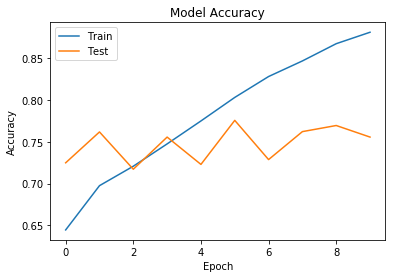

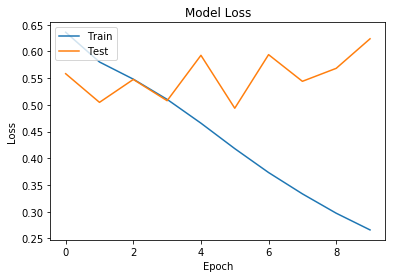

In [3]:
# Basic CNN, no image tinkering

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_base_image = model.fit_generator(train_batches,
                                         epochs=10,
                                         verbose=2,
                                         validation_data=val_batches
                                         )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_base_image.history['acc'])
plt.plot(history_base_image.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_base_image.history['loss'])
plt.plot(history_base_image.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:70: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:75: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, 

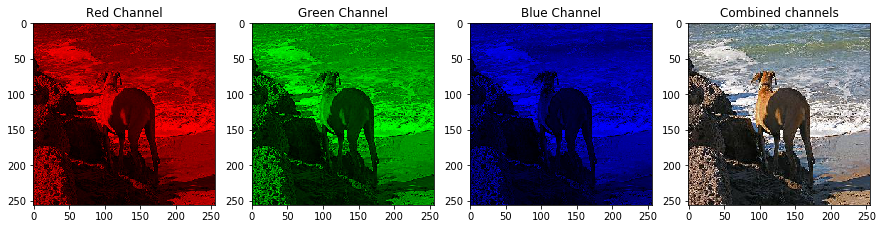

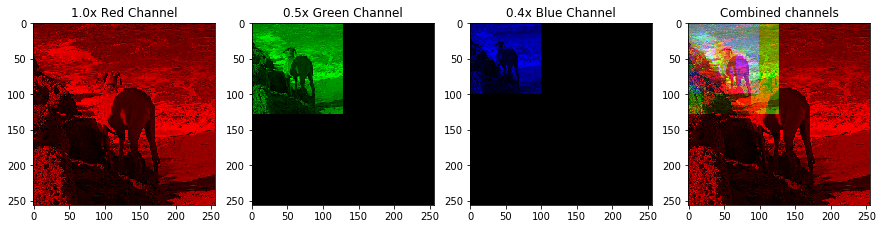

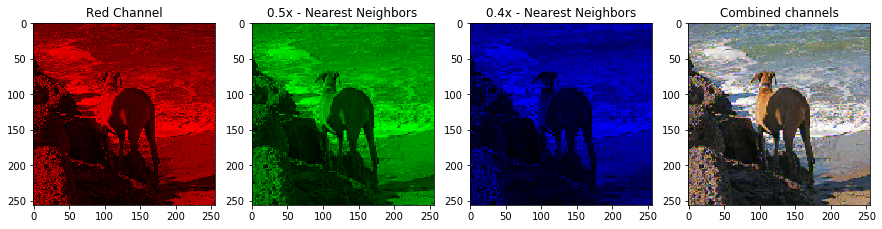

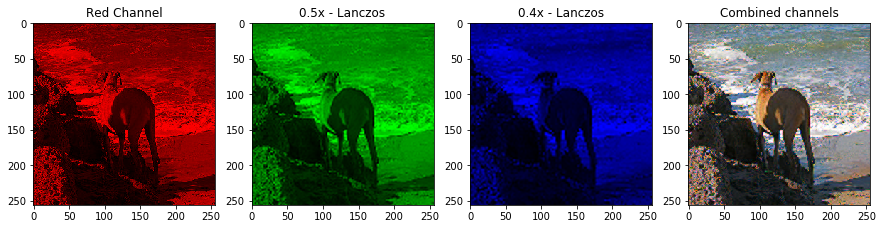

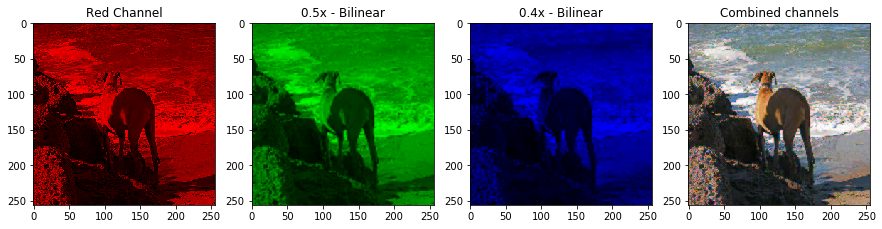

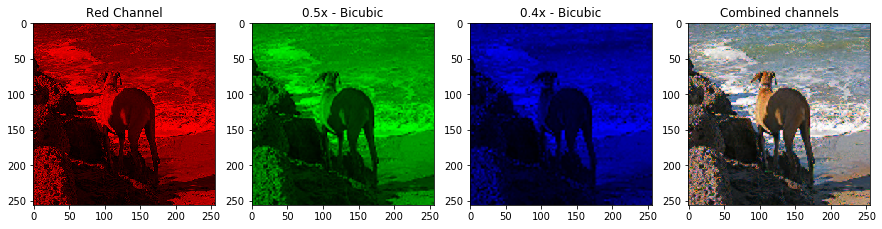

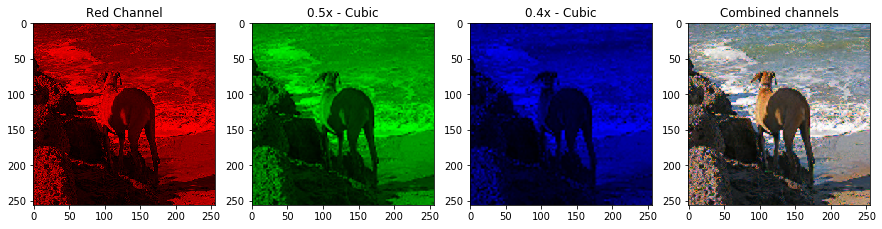

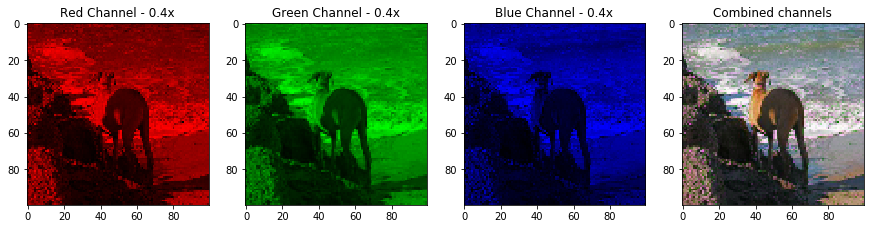

In [4]:
# Let's make a test where we resize the channels from the images. Scales: R=1.0, G=0.5, B=0.4

img = image.load_img('./dataset/train/dog/'+os.listdir('./dataset/train/dog')[0])
img = image.img_to_array(img)/255.


r = np.stack([img[:,:,0], np.zeros([256, 256]), np.zeros([256, 256])], axis=2)
g = np.stack([np.zeros([256, 256]), img[:,:,1], np.zeros([256, 256])], axis=2)
b = np.stack([np.zeros([256, 256]), np.zeros([256, 256]), img[:,:,2]], axis=2)

# Normal images
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r)

plt.subplot(1, 4, 2)
plt.title('Green Channel')
plt.imshow(g)

plt.subplot(1, 4, 3)
plt.title('Blue Channel')
plt.imshow(b)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r+g+b)


# Downscale images
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('1.0x Red Channel')
r_resized = np.zeros([256, 256, 3])
r_resized[0:256, 0:256, :] = (skimage.transform.resize(r, [256, 256]))
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x Green Channel')
g_resized = np.zeros([256, 256, 3])
g_resized[0:128, 0:128, :] = (skimage.transform.resize(g, [128, 128]))
plt.imshow(g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x Blue Channel')
b_resized = np.zeros([256, 256, 3])
b_resized[0:100, 0:100, :] = (skimage.transform.resize(b, [100, 100]))
plt.imshow(b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+g_resized+b_resized)

# Downscale channels
r_resized = (skimage.transform.resize(r, [256, 256]))
g_resized = (skimage.transform.resize(g, [128, 128]))
b_resized = (skimage.transform.resize(b, [100, 100]))

# Upscale images - nearest neighbors
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x - Nearest Neighbors')
new_g_resized = scipy.misc.imresize(g_resized, (256, 256), interp='nearest') / 255.
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x - Nearest Neighbors')
new_b_resized = scipy.misc.imresize(b_resized, (256, 256), interp='nearest') / 255.
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+new_g_resized+new_b_resized)


# Upscale images - lanczos
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x - Lanczos')
new_g_resized = scipy.misc.imresize(g_resized, (256, 256), interp='lanczos') / 255.
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x - Lanczos')
new_b_resized = scipy.misc.imresize(b_resized, (256, 256), interp='lanczos') / 255.
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+new_g_resized+new_b_resized)


# Upscale images - bilinear
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x - Bilinear')
new_g_resized = scipy.misc.imresize(g_resized, (256, 256), interp='bilinear') / 255.
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x - Bilinear')
new_b_resized = scipy.misc.imresize(b_resized, (256, 256), interp='bilinear') / 255.
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+new_g_resized+new_b_resized)


# Upscale images - bicubic
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x - Bicubic')
new_g_resized = scipy.misc.imresize(g_resized, (256, 256), interp='bicubic') / 255.
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x - Bicubic')
new_b_resized = scipy.misc.imresize(b_resized, (256, 256), interp='bicubic') / 255.
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+new_g_resized+new_b_resized)


# Upscale images - cubic
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel')
plt.imshow(r_resized)

plt.subplot(1, 4, 2)
plt.title('0.5x - Cubic')
new_g_resized = scipy.misc.imresize(g_resized, (256, 256), interp='cubic') / 255.
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('0.4x - Cubic')
new_b_resized = scipy.misc.imresize(b_resized, (256, 256), interp='cubic') / 255.
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(r_resized+new_g_resized+new_b_resized)

# Downscale all to smaller
fig = plt.figure(figsize = [15,15])

plt.subplot(1, 4, 1)
plt.title('Red Channel - 0.4x')
new_r_resized = skimage.transform.resize(r_resized, [100, 100])
plt.imshow(new_r_resized)

plt.subplot(1, 4, 2)
plt.title('Green Channel - 0.4x')
new_g_resized = skimage.transform.resize(g_resized, [100, 100])
plt.imshow(new_g_resized)

plt.subplot(1, 4, 3)
plt.title('Blue Channel - 0.4x')
new_b_resized = skimage.transform.resize(b_resized, [100, 100])
plt.imshow(new_b_resized)

plt.subplot(1, 4, 4)
plt.title('Combined channels')
plt.imshow(new_r_resized+new_g_resized+new_b_resized)

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10
 - 127s - loss: 0.6506 - acc: 0.6253 - val_loss: 0.5879 - val_acc: 0.6837
Epoch 2/10
 - 126s - loss: 0.5999 - acc: 0.6780 - val_loss: 0.5551 - val_acc: 0.7223
Epoch 3/10
 - 125s - loss: 0.5705 - acc: 0.7013 - val_loss: 0.5990 - val_acc: 0.6999
Epoch 4/10
 - 126s - loss: 0.5444 - acc: 0.7199 - val_loss: 0.5177 - val_acc: 0.7535
Epoch 5/10
 - 125s - loss: 0.5107 - acc: 0.7423 - val_loss: 0.5230 - val_acc: 0.7477
Epoch 6/10
 - 125s - loss: 0.4710 - acc: 0.7681 - val_loss: 0.5175 - val_acc: 0.7512
Epoch 7/10
 - 126s - loss: 0.4274 - acc: 0.7948 - val_loss: 0.5402 - val_acc: 0.7531
Epoch 8/10
 - 126s - loss: 0.3801 - acc: 0.8211 - val_loss: 0.5489 - val_acc: 0.7488
Epoch 9/10
 - 126s - loss: 0.3444 - acc: 0.8421 - val_loss: 0.5798 - val_acc: 0.7442
Epoch 10/10
 - 126s - loss: 0.3072 - acc: 0.8592 - val_loss: 0.6204 - val_acc: 0.7396
________________________________________________________________

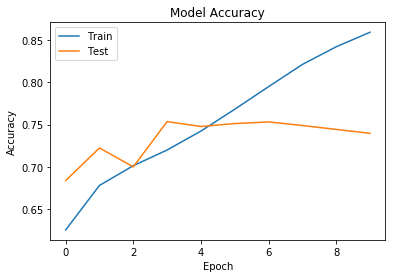

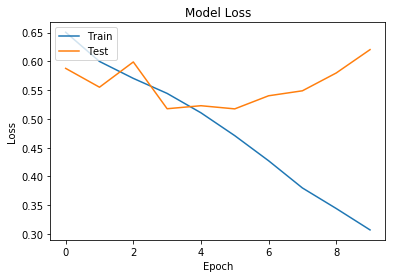

In [11]:
# Basic CNN, combined channels with no rescale
def no_rescale_images(image):
    r_resized = image[:,:,0]

    g_resized = np.zeros([100, 100])
    g_resized[0:50, 0:50] = (skimage.transform.resize(image[:,:,1], [50, 50]))

    b_resized = np.zeros([100, 100])
    b_resized[0:40, 0:40] = (skimage.transform.resize(image[:,:,2], [40, 40]))

    return(np.stack([r_resized, g_resized, b_resized], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_no_rescale = model.fit_generator(train_batches,
                                         epochs=10,
                                         verbose=2,
                                         validation_data=val_batches
                                         )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_no_rescale.history['acc'])
plt.plot(history_no_rescale.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_no_rescale.history['loss'])
plt.plot(history_no_rescale.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10


/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


 - 138s - loss: 0.6406 - acc: 0.6359 - val_loss: 0.5844 - val_acc: 0.6841
Epoch 2/10
 - 137s - loss: 0.5903 - acc: 0.6883 - val_loss: 0.5391 - val_acc: 0.7269
Epoch 3/10
 - 138s - loss: 0.5569 - acc: 0.7127 - val_loss: 0.5020 - val_acc: 0.7635
Epoch 4/10
 - 137s - loss: 0.5256 - acc: 0.7367 - val_loss: 0.5993 - val_acc: 0.7034
Epoch 5/10
 - 138s - loss: 0.4876 - acc: 0.7584 - val_loss: 0.5234 - val_acc: 0.7500
Epoch 6/10
 - 137s - loss: 0.4403 - acc: 0.7884 - val_loss: 0.5233 - val_acc: 0.7600
Epoch 7/10
 - 138s - loss: 0.3891 - acc: 0.8219 - val_loss: 0.5972 - val_acc: 0.7250
Epoch 8/10
 - 137s - loss: 0.3372 - acc: 0.8453 - val_loss: 0.5811 - val_acc: 0.7288
Epoch 9/10
 - 138s - loss: 0.2967 - acc: 0.8669 - val_loss: 0.5940 - val_acc: 0.7465
Epoch 10/10
 - 137s - loss: 0.2642 - acc: 0.8810 - val_loss: 0.6163 - val_acc: 0.7388
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)        

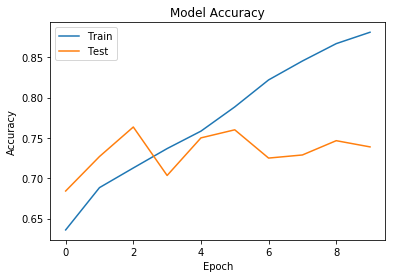

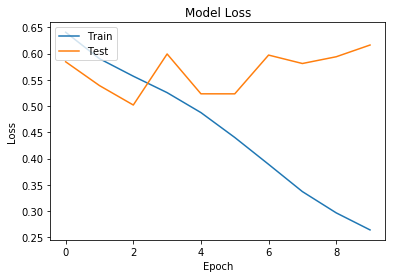

In [12]:
# Basic CNN, combined channels with Nearest Neighbors rescale
def no_rescale_images(image):
    r = image[:,:,0]

    g_downscaled = skimage.transform.resize(image[:,:,1], [50, 50])
    g_upscaled   = scipy.misc.imresize(g_downscaled, (100, 100), interp='nearest') / 255.


    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])
    b_upscaled   = scipy.misc.imresize(b_downscaled, (100, 100), interp='nearest') / 255.

    return(np.stack([r, g_upscaled, b_upscaled], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_nearest_neighbors = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_nearest_neighbors.history['acc'])
plt.plot(history_nearest_neighbors.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_nearest_neighbors.history['loss'])
plt.plot(history_nearest_neighbors.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10


/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


 - 149s - loss: 0.6499 - acc: 0.6208 - val_loss: 0.6397 - val_acc: 0.6387
Epoch 2/10
 - 149s - loss: 0.5948 - acc: 0.6825 - val_loss: 0.5438 - val_acc: 0.7242
Epoch 3/10
 - 149s - loss: 0.5589 - acc: 0.7095 - val_loss: 0.5361 - val_acc: 0.7331
Epoch 4/10
 - 148s - loss: 0.5236 - acc: 0.7361 - val_loss: 0.5504 - val_acc: 0.7200
Epoch 5/10
 - 148s - loss: 0.4803 - acc: 0.7649 - val_loss: 0.5990 - val_acc: 0.7015
Epoch 6/10
 - 148s - loss: 0.4384 - acc: 0.7915 - val_loss: 0.5662 - val_acc: 0.7315
Epoch 7/10
 - 148s - loss: 0.3858 - acc: 0.8210 - val_loss: 0.6074 - val_acc: 0.7261
Epoch 8/10
 - 148s - loss: 0.3487 - acc: 0.8386 - val_loss: 0.6467 - val_acc: 0.7196
Epoch 9/10
 - 149s - loss: 0.3120 - acc: 0.8584 - val_loss: 0.6873 - val_acc: 0.7134
Epoch 10/10
 - 148s - loss: 0.2811 - acc: 0.8745 - val_loss: 0.7876 - val_acc: 0.7049
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)        

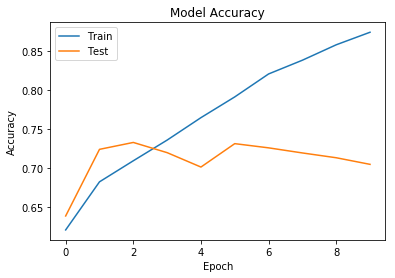

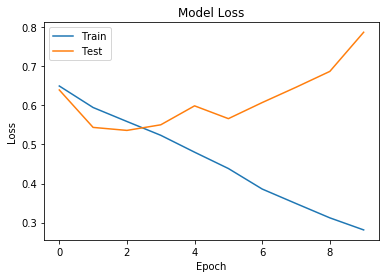

In [13]:
# Basic CNN, combined channels with Lanczos rescale
def no_rescale_images(image):
    r = image[:,:,0]

    g_downscaled = skimage.transform.resize(image[:,:,1], [50, 50])
    g_upscaled   = scipy.misc.imresize(g_downscaled, (100, 100), interp='lanczos') / 255.


    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])
    b_upscaled   = scipy.misc.imresize(b_downscaled, (100, 100), interp='lanczos') / 255.

    return(np.stack([r, g_upscaled, b_upscaled], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_lanczos = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_lanczos.history['acc'])
plt.plot(history_lanczos.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_lanczos.history['loss'])
plt.plot(history_lanczos.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10


/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


 - 141s - loss: 0.6425 - acc: 0.6323 - val_loss: 0.5773 - val_acc: 0.6995
Epoch 2/10
 - 141s - loss: 0.5907 - acc: 0.6865 - val_loss: 0.5308 - val_acc: 0.7357
Epoch 3/10
 - 141s - loss: 0.5528 - acc: 0.7157 - val_loss: 0.5028 - val_acc: 0.7712
Epoch 4/10
 - 140s - loss: 0.5115 - acc: 0.7437 - val_loss: 0.5149 - val_acc: 0.7542
Epoch 5/10
 - 141s - loss: 0.4612 - acc: 0.7730 - val_loss: 0.5537 - val_acc: 0.7203
Epoch 6/10
 - 140s - loss: 0.4094 - acc: 0.8067 - val_loss: 0.5959 - val_acc: 0.7288
Epoch 7/10
 - 140s - loss: 0.3509 - acc: 0.8343 - val_loss: 0.5936 - val_acc: 0.7423
Epoch 8/10
 - 141s - loss: 0.3040 - acc: 0.8617 - val_loss: 0.6240 - val_acc: 0.7342
Epoch 9/10
 - 140s - loss: 0.2667 - acc: 0.8806 - val_loss: 0.6545 - val_acc: 0.7296
Epoch 10/10
 - 141s - loss: 0.2439 - acc: 0.8921 - val_loss: 0.7311 - val_acc: 0.7369
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)       

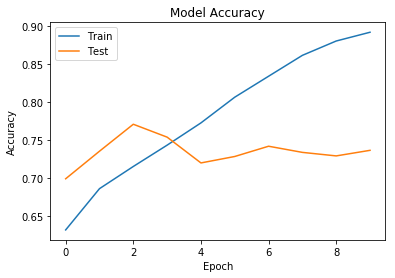

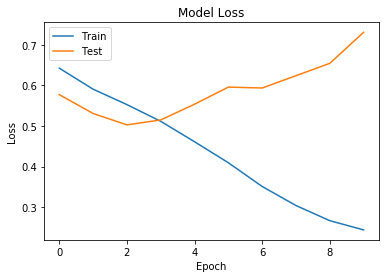

In [14]:
# Basic CNN, combined channels with Bilinear rescale
def no_rescale_images(image):
    r = image[:,:,0]

    g_downscaled = skimage.transform.resize(image[:,:,1], [50, 50])
    g_upscaled   = scipy.misc.imresize(g_downscaled, (100, 100), interp='bilinear') / 255.


    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])
    b_upscaled   = scipy.misc.imresize(b_downscaled, (100, 100), interp='bilinear') / 255.

    return(np.stack([r, g_upscaled, b_upscaled], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_bilinear = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_bilinear.history['acc'])
plt.plot(history_bilinear.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_bilinear.history['loss'])
plt.plot(history_bilinear.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10


/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


 - 144s - loss: 0.6545 - acc: 0.6154 - val_loss: 0.5903 - val_acc: 0.6899
Epoch 2/10
 - 143s - loss: 0.6091 - acc: 0.6730 - val_loss: 0.5718 - val_acc: 0.7180
Epoch 3/10
 - 142s - loss: 0.5783 - acc: 0.6975 - val_loss: 0.5520 - val_acc: 0.6965
Epoch 4/10
 - 143s - loss: 0.5516 - acc: 0.7181 - val_loss: 0.5770 - val_acc: 0.6787
Epoch 5/10
 - 143s - loss: 0.5262 - acc: 0.7348 - val_loss: 0.5294 - val_acc: 0.7076
Epoch 6/10
 - 143s - loss: 0.5019 - acc: 0.7498 - val_loss: 0.5422 - val_acc: 0.7042
Epoch 7/10
 - 142s - loss: 0.4740 - acc: 0.7686 - val_loss: 0.5538 - val_acc: 0.6995
Epoch 8/10
 - 143s - loss: 0.4490 - acc: 0.7839 - val_loss: 0.5557 - val_acc: 0.7018
Epoch 9/10
 - 142s - loss: 0.4256 - acc: 0.7990 - val_loss: 0.5525 - val_acc: 0.7188
Epoch 10/10
 - 143s - loss: 0.4060 - acc: 0.8090 - val_loss: 0.5753 - val_acc: 0.6864
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)       

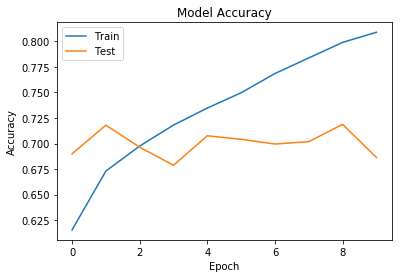

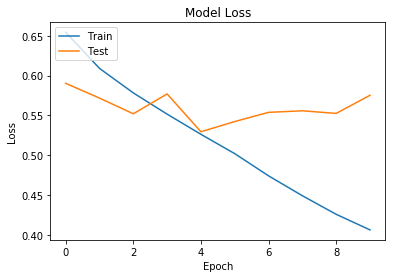

In [15]:
# Basic CNN, combined channels with Bicubic rescale
def no_rescale_images(image):
    r = image[:,:,0]

    g_downscaled = skimage.transform.resize(image[:,:,1], [50, 50])
    g_upscaled   = scipy.misc.imresize(g_downscaled, (100, 100), interp='bicubic') / 255.


    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])
    b_upscaled   = scipy.misc.imresize(b_downscaled, (100, 100), interp='bicubic') / 255.

    return(np.stack([r, g_upscaled, b_upscaled], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_bicubic = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_bicubic.history['acc'])
plt.plot(history_bicubic.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_bicubic.history['loss'])
plt.plot(history_bicubic.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10


/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/ubuntu/python-tensorflow-12-gpu-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


 - 145s - loss: 0.6400 - acc: 0.6350 - val_loss: 0.5518 - val_acc: 0.7311
Epoch 2/10
 - 143s - loss: 0.5887 - acc: 0.6887 - val_loss: 0.5263 - val_acc: 0.7492
Epoch 3/10
 - 143s - loss: 0.5582 - acc: 0.7119 - val_loss: 0.5319 - val_acc: 0.7446
Epoch 4/10
 - 143s - loss: 0.5278 - acc: 0.7317 - val_loss: 0.5354 - val_acc: 0.7384
Epoch 5/10
 - 143s - loss: 0.4832 - acc: 0.7605 - val_loss: 0.5349 - val_acc: 0.7253
Epoch 6/10
 - 143s - loss: 0.4384 - acc: 0.7895 - val_loss: 0.5661 - val_acc: 0.7273
Epoch 7/10
 - 143s - loss: 0.3779 - acc: 0.8226 - val_loss: 0.5417 - val_acc: 0.7473
Epoch 8/10
 - 143s - loss: 0.3300 - acc: 0.8501 - val_loss: 0.6297 - val_acc: 0.7327
Epoch 9/10
 - 142s - loss: 0.2858 - acc: 0.8719 - val_loss: 0.7137 - val_acc: 0.6992
Epoch 10/10
 - 144s - loss: 0.2529 - acc: 0.8888 - val_loss: 0.6618 - val_acc: 0.7404
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)       

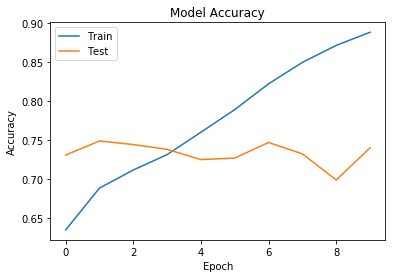

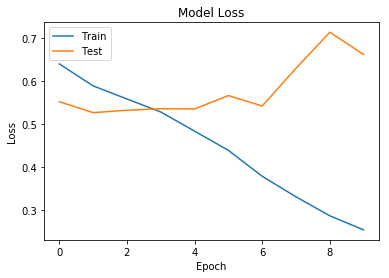

In [16]:
# Basic CNN, combined channels with Cubic rescale
def no_rescale_images(image):
    r = image[:,:,0]

    g_downscaled = skimage.transform.resize(image[:,:,1], [50, 50])
    g_upscaled   = scipy.misc.imresize(g_downscaled, (100, 100), interp='cubic') / 255.


    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])
    b_upscaled   = scipy.misc.imresize(b_downscaled, (100, 100), interp='cubic') / 255.

    return(np.stack([r, g_upscaled, b_upscaled], axis=2))

# Model
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_cubic = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_cubic.history['acc'])
plt.plot(history_cubic.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_cubic.history['loss'])
plt.plot(history_cubic.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Basic CNN, combined channels downscaled to smallest channel
def no_rescale_images(image):
    r_downscaled = skimage.transform.resize(image[:,:,0], [40, 40])
    g_downscaled = skimage.transform.resize(image[:,:,1], [40, 40])
    b_downscaled = skimage.transform.resize(image[:,:,2], [40, 40])

    return(np.stack([r_downscaled, g_downscaled, b_downscaled], axis=2))

# Model
inputs = Input(shape=(40, 40, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[40, 40],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[40, 40],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

# Starts training the model
history_downscaled = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=2,
                                               validation_data=val_batches
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_downscaled.history['acc'])
plt.plot(history_downscaled.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_downscaled.history['loss'])
plt.plot(history_downscaled.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10
 - 139s - loss: 0.6457 - acc: 0.6219 - val_loss: 0.5501 - val_acc: 0.7392
Epoch 2/10
 - 138s - loss: 0.6028 - acc: 0.6743 - val_loss: 0.5232 - val_acc: 0.7435
Epoch 3/10
 - 138s - loss: 0.5867 - acc: 0.6901 - val_loss: 0.5314 - val_acc: 0.7292
Epoch 4/10
 - 138s - loss: 0.5744 - acc: 0.6993 - val_loss: 0.5325 - val_acc: 0.7323
Epoch 5/10
 - 138s - loss: 0.5615 - acc: 0.7100 - val_loss: 0.5257 - val_acc: 0.7492
Epoch 6/10
 - 138s - loss: 0.5514 - acc: 0.7159 - val_loss: 0.5182 - val_acc: 0.7431
Epoch 7/10
 - 138s - loss: 0.5381 - acc: 0.7257 - val_loss: 0.5285 - val_acc: 0.7461
Epoch 8/10
 - 138s - loss: 0.5257 - acc: 0.7352 - val_loss: 0.5018 - val_acc: 0.7689
Epoch 9/10
 - 138s - loss: 0.5121 - acc: 0.7427 - val_loss: 0.5054 - val_acc: 0.7650
Epoch 10/10


# Multiresolution CNN

Found 34399 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.
Epoch 1/10
2150/2150 [==============================] - 132s 61ms/step - loss: 0.6542 - acc: 0.6115 - val_loss: 0.6012 - val_acc: 0.7018
Epoch 2/10
2150/2150 [==============================] - 131s 61ms/step - loss: 0.6214 - acc: 0.6599 - val_loss: 0.5858 - val_acc: 0.6980
Epoch 3/10
2150/2150 [==============================] - 132s 62ms/step - loss: 0.6048 - acc: 0.6727 - val_loss: 0.5630 - val_acc: 0.7157
Epoch 4/10
2150/2150 [==============================] - 132s 61ms/step - loss: 0.5911 - acc: 0.6858 - val_loss: 0.5398 - val_acc: 0.7388
Epoch 5/10
2150/2150 [==============================] - 130s 61ms/step - loss: 0.5824 - acc: 0.6942 - val_loss: 0.5459 - val_acc: 0.7450
Epoch 6/10
2150/2150 [==============================] - 131s 61ms/step - loss: 0.5711 - acc: 0.7000 - val_loss: 0.5171 - val_acc: 0.7477
Epoch 7/10
2150/2150 [==============================] - 131s 61ms/step - loss: 0.5609 - acc: 

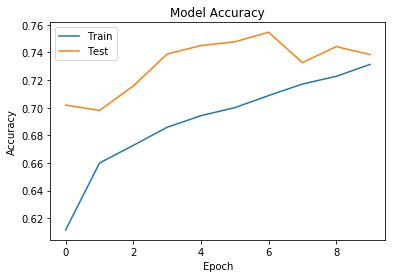

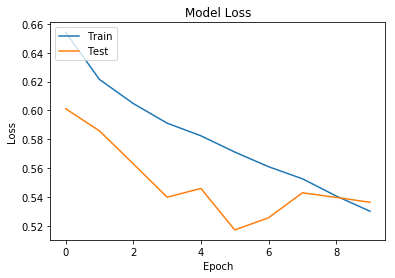

In [80]:
# Let's create a CNN where larger matrix inputs go trough conv layers and then stack themselves onto smaller
# layers, when they match size.

# There are MANY, MANY trickeries to make it run o Keras. It should be easier to code this if I didn't use
# flow_from_directory, because it doesn't allow anything but a image to be the model input.
def no_rescale_images(image):

    r_resized = image[:,:,0]

    g_resized = np.zeros([100, 100])
    g_resized[0:50, 0:50] = (skimage.transform.resize(image[:,:,1], [50, 50]))

    b_resized = np.zeros([100, 100])
    b_resized[0:40, 0:40] = (skimage.transform.resize(image[:,:,2], [40, 40]))

    return(np.stack([r_resized, g_resized, b_resized], axis=2))

#     return(np.stack([r_resized, g_resized, b_resized], axis=2))
#     return([r_resized, g_resized, b_resized])
#     return(r_resized.reshape((100, 100, 1)))
#     print(r_resized.shape)
#     return(r_resized)

# Model
inputs = Input(shape=(100, 100, 3))

input_100 = Lambda(lambda x : manip.reshape(x[:,:,:,0], (-1, 100, 100, 1)))(inputs)
input_50  = Lambda(lambda x : manip.reshape(x[:,0:50,0:50,1], (-1, 50, 50, 1)))(inputs)
input_40  = Lambda(lambda x : manip.reshape(x[:,0:40,0:40,2], (-1, 40, 40, 1)))(inputs)

x = Conv2D(1, (51, 51), padding='valid', activation='relu', kernel_initializer=kernel_initializer)(input_100)

x = Concatenate()([x, input_50])
x = Conv2D(2, (11, 11), padding='valid', activation='relu', kernel_initializer=kernel_initializer)(x)
x = Concatenate()([x, input_40])

x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25, seed=seed)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer=kernel_initializer)(x)
x = Dropout(0.25, seed=seed)(x)

outputs = Dense(2, activation='softmax', kernel_initializer=kernel_initializer)(x)

model = Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255,
    preprocessing_function=no_rescale_images
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/train/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_batches = generator.flow_from_directory(
    batch_size=16,
    directory='./dataset/validation/',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

tensorboard_callback = TensorBoard(
    log_dir='./logs/multires_cnn',
    histogram_freq=0,
    batch_size=16
)

# Starts training the model
history_multires_cnn = model.fit_generator(train_batches,
                                               epochs=10,
                                               verbose=1,
                                               validation_data=val_batches,
                                               callbacks=[tensorboard_callback]
                                               )

# Model summary
model.summary()

# Plots results
## Accuracy
plt.plot(history_multires_cnn.history['acc'])
plt.plot(history_multires_cnn.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
## Loss
plt.plot(history_multires_cnn.history['loss'])
plt.plot(history_multires_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()